# Chain (directional trend) # 
Every pair of consecutive subsequences in a chain must be connected by both a forward arrow and a backward arrow. The key component of drifting is that the time series must contain chains with clear directionality

https://stumpy.readthedocs.io/en/latest/Tutorial_Time_Series_Chains.html

https://sites.google.com/site/timeserieschain/

In [1]:
import stumpy
import helper.testdata as testdata
import helper.visualize as visualize
import helper.results as results

### Hemodynamics Data ###

Ground Truth: Chains are arterial blood pressure (ABP). Therefore m=200, as this is the typical length of an ABP signal.

/vol/fob-vol3/mi20/hirschmi/mp_dilation_master/experiments_master_mp_dilation/usecases/helper/results.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.array([T, m, d, mp, all_chain_set, unanchored_chain])


[  608  1615  1817 17674 18272 18476 22376 23812 24635]


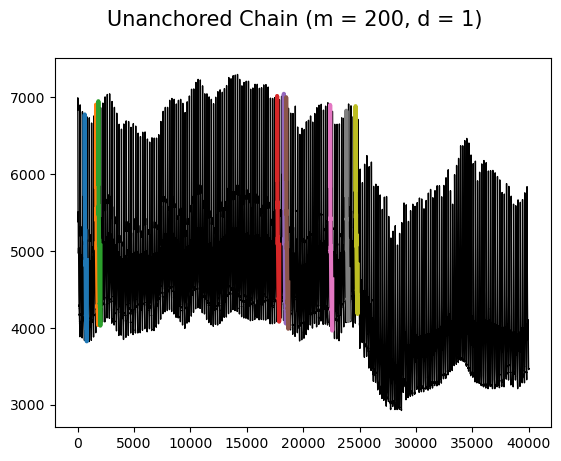

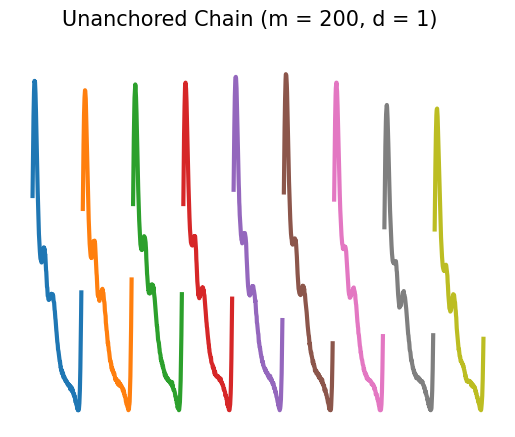

In [2]:
save_results = True
data_name = "hemodynamics"
T = testdata.load_from_txt("../data/chains/hemodynamics.txt")

# without dilation
m = 200 # target for ABP
d = 1
mp = stumpy.stump(T, m=m)
all_chain_set, unanchored_chain = stumpy.allc(mp[:, 2], mp[:, 3])
if save_results: 
    file_path = "../results/chains/hemodynamics_d" + str(d) + "_m" + str(m) + ".npy"
    results.save_chains(T, m, d, mp, all_chain_set, unanchored_chain, file_path)


T, m, d, mp, all_chain_set, unanchored_chain = results.load_chains(data_name, m, d)
print(unanchored_chain)
visualize.chain_unanchored(T, unanchored_chain, m, d)
visualize.chain_unanchored_snippets(T, unanchored_chain, m, d)

# with dilation
# target_r = 200 # target for ABP
# ds = [2,3,4,5,6,7,8]
# for d in ds:
#     m = round((target_r-1)/d) + 1
#     mp = stumpy.stump_dil(T, m=m, d=d)
#     all_chain_set, unanchored_chain = stumpy.allc(mp[:, 2], mp[:, 3])
#     if save_results: 
#         file_path = file_path = "../results/chains/hemodynamics_" + str(d) + "_" + str(m) + ".npy"
#         results.save_chains(T, m, d, mp, all_chain_set, unanchored_chain, file_path)
    
#     print(unanchored_chain)
#     visualize.chain_unanchored(T, unanchored_chain, m, d)
#     visualize.chain_unanchored_snippets(T, unanchored_chain, m, d)



### Web Query Data ###

In [ ]:
# df = pd.read_csv("https://zenodo.org/record/4276348/files/Time_Series_Chains_Kohls_data.csv?download=1")
# df.head()
# T = df['volume']

m=10
d=1

mp = stumpy.stump(T, m=m)
all_chain_set, unanchored_chain = stumpy.allc(mp[:, 2], mp[:, 3])

visualize.chain_unanchored(T, unanchored_chain, m, d)
visualize.chain_unanchored_snippets(T, unanchored_chain, m, d)